### Importing the nescessary libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,IPL-2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
364,365,IPL-2012,Jaipur,13-05-2012,Rajasthan Royals,Pune Warriors,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,A Chandila,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
175,176,IPL-2010,Mumbai,13-03-2010,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
225,226,IPL-2010,Bangalore,17-04-2010,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,57,0,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN
159,160,IPL-2009,Durban,14-05-2009,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper,NaN


In [4]:
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
141463,598,2,Rising Pune Supergiants,Sunrisers Hyderabad,4,4,SPD Smith,F du Plessis,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
36813,158,1,Delhi Daredevils,Deccan Chargers,4,3,G Gambhir,TM Dilshan,WPUJC Vaas,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170124,11314,1,Kolkata Knight Riders,Chennai Super Kings,4,5,RV Uthappa,KD Karthik,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
169660,11312,1,Rajasthan Royals,Kolkata Knight Riders,3,6,JC Buttler,SPD Smith,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
73322,311,2,Kings XI Punjab,Rajasthan Royals,18,5,PP Chawla,JP Faulkner,A Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### Checking the shape and column types

In [5]:
match.shape      #all the matches from 2008-2019

(756, 18)

In [6]:
delivery.shape    #ball by ball detail of each match

(179078, 21)

In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
#checking the total runs made in every match, we have grouped every match by their match_id
#then we have grouped all the runs scored in a particular inning, giving us total runs made in that inning
total_score = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [10]:
total_score.sample()

,match_id,inning,total_runs
1469,11323,2,180


In [11]:
# now we will filter out the score of all the first innings of all the match, as we want to predict the percentage 
# of winning for the chasing team.
total_score = total_score[total_score['inning'] == 1]

In [12]:
total_score.shape    #rows = 1528, total no. of matches = 756, every match has 2 innings

(756, 3)

### Now, we will merge both the datasets i.e. match and total_score, from the match datase, we have the information of every match, which team won, opposing team etc, and from the total_score dataset, we will get the amount of runs scored by the team batting first

In [13]:
final = match.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')


In [14]:
final.sample(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
391,392,IPL-2013,Bangalore,11-04-2013,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,Asad Rauf,AK Chaudhary,NaN,392,154
204,205,IPL-2010,Chandigarh,02-04-2010,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,6,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",BF Bowden,M Erasmus,NaN,205,181


In [15]:
final.shape

(756, 20)

### Now there are some teams which are not a part of the tournament anymore, we will remove those teams and keep teams which are still a part of the tournament

In [16]:
final['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
#Now we will remove teams like : Pune warriors, Rising Pune Supergiants and Kochi Tuskers Kerala
#And we will rename Deccan chargers as Sunrisers Hyderabad, Delhi dare as Delhi cap

teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [18]:
#renaming delhi daredevils as delhi capitals
final['team1'] = final['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
final['team2'] = final['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
#replace DC as SRH
final['team1'] = final['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final['team2'] = final['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [19]:
#only keeping the rows/matches where only the selected teams are playing
final = final[final['team1'].isin(teams)]
final = final[final['team2'].isin(teams)]

In [20]:
#now we will check the shape of our final DF
final.shape

(641, 20)

In [21]:
#as we can see, there is a column of Duckward Lewis, we dont want those matches which were affected
#by rain, so we will only take matches where its value is 0
final = final[final['dl_applied']==0]

In [22]:
final.shape

(626, 20)

### Now we will only take the columns which are useful for us, I.E for your prediction

In [23]:
#we will take matchid, city, winner and total runs, all the other fields are not that important
final = final[['match_id','city','winner','total_runs']]

### Now we will join the new df with the delivery df

In [24]:
del_fin = final.merge(delivery,on = 'match_id')

### Now we will filter out the data for 2nd innings, as we need to predict during the chase

In [25]:
del_fin = del_fin[del_fin['inning']==2]

In [26]:
del_fin.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
14987,93,Jaipur,Rajasthan Royals,156,2,Rajasthan Royals,Delhi Daredevils,11,2,GC Smith,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [27]:
del_fin.shape

(72413, 24)

### Now we  will try to find out the data of each match's 2nd inning, i.e. no. of balls left, runs left, current run rate, required run rate, which will help us in predicting

In [28]:
#finding the ball by ball runs scored
del_fin['Ball_by_Ball_Runs'] = del_fin.groupby('match_id').cumsum()['total_runs_y']

In [29]:
del_fin.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs
122677,7898,Chennai,Chennai Super Kings,207,2,Chennai Super Kings,Kolkata Knight Riders,19,5,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,190


In [30]:
#now we will find out the runs left after each ball
del_fin['Runs_Left'] = del_fin['total_runs_x'] - del_fin['Ball_by_Ball_Runs'] + 1
del_fin.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left
99989,514,Kolkata,Kolkata Knight Riders,163,2,Kings XI Punjab,Kolkata Knight Riders,20,3,MG Johnson,...,0,0,0,0,0,NaN,NaN,NaN,135,29


In [31]:
# now we will find balls left after each delivery
del_fin['Balls_Left'] = 120 - (del_fin['over']*6 + del_fin['ball'])
del_fin.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left,Balls_Left
740,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,19,3,N Rana,...,0,0,1,1,NaN,NaN,NaN,160,19,3


In [32]:
#now we will look in the player dismissed column, replace nan value with string 0
del_fin['player_dismissed'] = del_fin['player_dismissed'].fillna('0')
#now we will convert wherever there is not 0 to 1, hence giving us 0 and 1 for out
del_fin['player_dismissed'] = del_fin['player_dismissed'].apply(lambda x:x if x=='0' else '1' )
#changing string to int
del_fin['player_dismissed'] = del_fin['player_dismissed'].astype('int')
#now saving the wickets in a new variable to use later
wickets = del_fin.groupby('match_id').cumsum()['player_dismissed'].values
#now saving the number of wickets left
del_fin['Wickets_left'] = 10 - wickets
del_fin.sample(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left,Balls_Left,Wickets_left
37607,192,Bangalore,Royal Challengers Bangalore,171,2,Chennai Super Kings,Royal Challengers Bangalore,8,2,ML Hayden,...,4,0,4,0,NaN,NaN,38,134,70,9


In [33]:
#now we will find the Current run rate
del_fin['Current_Run_Rate'] = (del_fin['Ball_by_Ball_Runs']*6)/(120-del_fin['Balls_Left'])

In [34]:
del_fin.sample(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left,Balls_Left,Wickets_left,Current_Run_Rate
51550,258,Kolkata,Royal Challengers Bangalore,171,2,Royal Challengers Bangalore,Kolkata Knight Riders,6,2,CH Gayle,...,0,1,0,NaN,NaN,48,124,82,10,7.578947


In [35]:
#now we will find Req rr
del_fin['Req_Run_Rate'] = (del_fin['Runs_Left']*6)/del_fin['Balls_Left'] 
del_fin.sample(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left,Balls_Left,Wickets_left,Current_Run_Rate,Req_Run_Rate
13572,87,Delhi,Chennai Super Kings,187,2,Chennai Super Kings,Delhi Daredevils,7,3,MS Dhoni,...,1,0,NaN,NaN,64,124,75,9,8.533333,9.920000
124793,7908,Jaipur,Kolkata Knight Riders,165,2,Kolkata Knight Riders,Rajasthan Royals,9,1,SP Narine,...,2,0,NaN,NaN,70,96,65,9,7.636364,8.861538


In [36]:
#now since we have taken the data only for chasing team, we will find the result in their respect
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
#if the batting team is winner, then we put result as 1, else 0

In [37]:
#applying it on the data
del_fin['Result'] = del_fin.apply(result,axis=1)
del_fin.sample(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,Ball_by_Ball_Runs,Runs_Left,Balls_Left,Wickets_left,Current_Run_Rate,Req_Run_Rate,Result
683,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,9,6,N Rana,...,0,NaN,NaN,72,107,60,8,7.2,10.7,1


In [38]:
#taking out the relevant columns
pred_fin = del_fin[['batting_team','bowling_team','city','Runs_Left','Balls_Left','Wickets_left','total_runs_x','Current_Run_Rate','Req_Run_Rate','Result']]

In [39]:
pred_fin.sample(5)

,batting_team,bowling_team,city,Runs_Left,Balls_Left,Wickets_left,total_runs_x,Current_Run_Rate,Req_Run_Rate,Result
114428,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,192,94,9,227,8.307692,12.255319,0
129177,Chennai Super Kings,Royal Challengers Bangalore,Pune,81,73,9,131,6.510638,6.657534,1
3275,Delhi Daredevils,Mumbai Indians,Mumbai,133,105,8,142,4.000000,7.600000,0
47528,Royal Challengers Bangalore,Deccan Chargers,Mumbai,50,75,10,82,4.400000,4.000000,1
85745,Mumbai Indians,Chennai Super Kings,Delhi,180,98,9,192,3.545455,11.020408,0


In [40]:
#now since our data is in order by each match, which can have a biased result, we will shuffle the data
pred_fin = pred_fin.sample(pred_fin.shape[0])

In [41]:
pred_fin.head()

,batting_team,bowling_team,city,Runs_Left,Balls_Left,Wickets_left,total_runs_x,Current_Run_Rate,Req_Run_Rate,Result
60223,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,43,-6,1,165,5.857143,-43.000000,0
145839,Chennai Super Kings,Mumbai Indians,Chennai,125,85,7,159,6.000000,8.823529,0
19930,Chennai Super Kings,Kings XI Punjab,Mumbai,73,75,9,112,5.333333,5.840000,1
88620,Sunrisers Hyderabad,Kings XI Punjab,Sharjah,182,104,9,193,4.500000,10.500000,0
21277,Royal Challengers Bangalore,Deccan Chargers,Cape Town,153,76,8,184,4.363636,12.078947,0


In [42]:
#now we will check for null values
pred_fin.isna().sum()

batting_team          0
bowling_team          0
city                832
Runs_Left             0
Balls_Left            0
Wickets_left          0
total_runs_x          0
Current_Run_Rate      0
Req_Run_Rate          6
Result                0
dtype: int64

In [43]:
#checking the percentage of null values
pred_fin.isna().mean()*100

batting_team        0.000000
bowling_team        0.000000
city                1.148965
Runs_Left           0.000000
Balls_Left          0.000000
Wickets_left        0.000000
total_runs_x        0.000000
Current_Run_Rate    0.000000
Req_Run_Rate        0.008286
Result              0.000000
dtype: float64

In [44]:
#since the null values are very less, we can just drop them, no need to treat them
pred_fin.dropna(inplace = True)

In [45]:
pred_fin.isna().sum()

batting_team        0
bowling_team        0
city                0
Runs_Left           0
Balls_Left          0
Wickets_left        0
total_runs_x        0
Current_Run_Rate    0
Req_Run_Rate        0
Result              0
dtype: int64

In [46]:
#now we will check the overall data, like max, min, mean and other statistical values
pred_fin.describe()

,Runs_Left,Balls_Left,Wickets_left,total_runs_x,Current_Run_Rate,Req_Run_Rate,Result
count,71576.000000,71576.000000,71576.000000,71576.000000,71576.000000,7.157600e+04,71576.000000
mean,93.383313,56.672739,7.537848,165.766710,6.382669,NaN,0.525246
std,50.058881,33.399246,2.139656,29.291561,2.080450,NaN,0.499366
min,-15.000000,-8.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,54.000000,29.000000,6.000000,147.000000,5.333333,7.894737e+00,0.000000
50%,93.000000,57.000000,8.000000,165.000000,6.606061,9.845407e+00,1.000000
75%,131.000000,86.000000,9.000000,185.000000,7.741935,1.251502e+01,1.000000
max,250.000000,113.000000,10.000000,250.000000,15.000000,inf,1.000000


In [47]:
#we can see that the req run rate is inf, that can only be the case if balls remaining is 0 and runs are left
pred_fin = pred_fin[pred_fin['Balls_Left'] != 0]
pred_fin.describe()

,Runs_Left,Balls_Left,Wickets_left,total_runs_x,Current_Run_Rate,Req_Run_Rate,Result
count,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000
mean,93.785840,56.995237,7.557797,165.726546,6.375975,10.800114,0.525959
std,49.892224,33.218616,2.124749,29.308485,2.082590,25.000445,0.499329
min,-15.000000,-8.000000,0.000000,65.000000,0.000000,-702.000000,0.000000
25%,54.000000,29.000000,6.000000,147.000000,5.318182,7.883721,0.000000
50%,93.000000,58.000000,8.000000,165.000000,6.600000,9.825000,1.000000
75%,131.000000,86.000000,9.000000,185.000000,7.735537,12.448180,1.000000
max,250.000000,113.000000,10.000000,250.000000,15.000000,708.000000,1.000000


In [48]:
#now we can see, that if Req rr is greater than 36, we can just write it as 36, no need to write the values
lower = 0
upper = 36
pred_fin['Req_Run_Rate'] = np.where(pred_fin['Req_Run_Rate']>upper,upper,
                                   np.where(pred_fin['Req_Run_Rate']<lower,lower,
                                           pred_fin['Req_Run_Rate']))

In [49]:
pred_fin.describe()

,Runs_Left,Balls_Left,Wickets_left,total_runs_x,Current_Run_Rate,Req_Run_Rate,Result
count,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000,71171.000000
mean,93.785840,56.995237,7.557797,165.726546,6.375975,11.185255,0.525959
std,49.892224,33.218616,2.124749,29.308485,2.082590,6.644798,0.499329
min,-15.000000,-8.000000,0.000000,65.000000,0.000000,0.000000,0.000000
25%,54.000000,29.000000,6.000000,147.000000,5.318182,7.883721,0.000000
50%,93.000000,58.000000,8.000000,165.000000,6.600000,9.825000,1.000000
75%,131.000000,86.000000,9.000000,185.000000,7.735537,12.448180,1.000000
max,250.000000,113.000000,10.000000,250.000000,15.000000,36.000000,1.000000


In [50]:
#now we will start our modeling, first we will use TrainTestSplit
X = pred_fin.iloc[:,:-1]
y = pred_fin.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
#now we will use column transformer and one hot encoding
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [52]:
#now we will create a pipeline to run it
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [53]:
#now we will fit the training data in the pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [54]:
#now we will predict the outcome
y_pred = pipe.predict(X_test)

In [55]:
#now we will check the accuracy of our model
accuracy_score(y_test,y_pred)

0.8016157358623112

In [56]:
pipe.predict_proba(X_test)[10]

array([0.97718847, 0.02281153])

### We are not using any other model because only Logistic Regression gives the best result for winning probablities in this situation

### We will create a function to plot the over by ovr probablities of both the team's winning chances

In [57]:
#creating a summary for showing match summary
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [66]:
#creating a function to show the progression of the match
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]  #filtering a particular match
    match = match[(match['ball'] == 6)]     #taking data of a particular over, i.e. skipping ball wise data
    temp_df = match[['batting_team','bowling_team','city','Runs_Left','Balls_Left','Wickets_left','total_runs_x','Current_Run_Rate','Req_Run_Rate']].dropna()
    temp_df = temp_df[temp_df['Balls_Left'] != 0]   #leaving out the data where the over's are finished
    result = pipe.predict_proba(temp_df)     #predicting the outcome from out model
    temp_df['lose'] = np.round(result.T[0]*100,1)   #setting value for lose column
    temp_df['win'] = np.round(result.T[1]*100,1)    #setting value for win column
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)    #setting value to show the end of over
    
    target = temp_df['total_runs_x'].values[0]     #taking out the target for the match
    runs = list(temp_df['Runs_Left'].values)      #showing the runs made
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)   #showing runs made within the over
    wickets = list(temp_df['Wickets_left'].values)   #showing if any wicket fell
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [75]:
temp_df,target = match_progression(del_fin,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,10,0,89.2,10.8
136,2,1,0,91.4,8.6
142,3,16,0,84.3,15.7
148,4,11,0,78.7,21.3
155,5,5,0,78.9,21.1
162,6,10,1,84.0,16.0
168,7,7,1,89.9,10.1
174,8,13,0,84.5,15.5
180,9,10,0,80.2,19.8
187,10,10,0,75.1,24.9


Text(0.5, 1.0, 'Target-207')

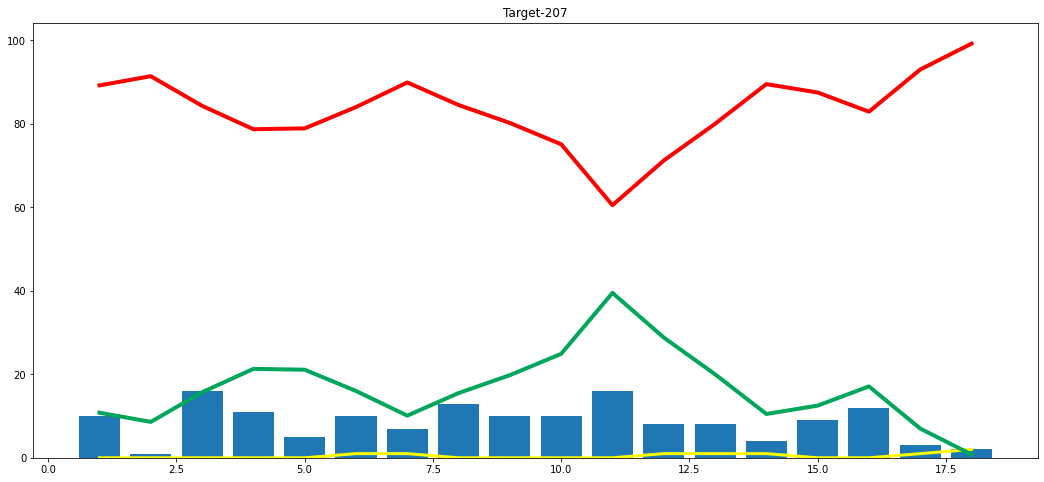

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

### To implement it on a website, we will need the name of all teams, name of all venues

In [77]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [78]:
pred_fin['city'].unique()

array(['Bangalore', 'Chennai', 'Mumbai', 'Sharjah', 'Cape Town', 'Jaipur',
       'Delhi', 'Visakhapatnam', 'Pune', 'Hyderabad', 'Kolkata',
       'Kimberley', 'Durban', 'Abu Dhabi', 'Chandigarh', 'Centurion',
       'Port Elizabeth', 'East London', 'Cuttack', 'Raipur', 'Indore',
       'Ranchi', 'Johannesburg', 'Dharamsala', 'Bengaluru', 'Ahmedabad',
       'Nagpur', 'Mohali', 'Bloemfontein'], dtype=object)

In [79]:
#converting the model in a pickle file
pickle.dump(pipe,open('pred.pkl','wb'))